#Collecting Data

Data ini diambil dari kaggle https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

#Preparing Dataset

1. Importing necessary library
2. Filtering dataset (surabaya only)
3. Cleaning unnecessary variable
4. Exploratory data analysis

#Importing necessary library


In [19]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Filtering Dataset (Surabaya Only)

In [4]:
#importing dataset
place = pd.read_csv('/content/drive/MyDrive/BANGKIT 2023/PROJECT/tourism_new.csv', sep=";")
rating = pd.read_csv('/content/drive/MyDrive/BANGKIT 2023/PROJECT/tourism_rating.csv')
user = pd.read_csv('/content/drive/MyDrive/BANGKIT 2023/PROJECT/user.csv')


In [8]:
#looking for data
print(place.head())
place.info()

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

   Price  Rating  Time_Minutes  \
0      0     4.4          60.0   
1  35000     4.4          45.0   
2      0     4.6           NaN   
3  15000     4.4          30.0   
4      0     4.4          45.0   

                                        Coordinate          Lat  \
0          {

In [9]:
#looking for data
print(rating.head())
rating.info()

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [10]:
#looking for data
print(user.head())
user.info()

   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [11]:
#filtering data
#1. menyeleksi rating hanya berdasarkan kota Surabaya
rating = pd.merge(rating, place[['Place_Id']], how ='right', on='Place_Id')

#2. menyeleksi user yang hanya pernah mengunjungi kota Surabaya
user = pd.merge(user, rating[['User_Id']], how = 'right', on='User_Id').drop_duplicates().sort_values('User_Id')

print(rating.tail())
print(user.tail())

     User_Id  Place_Id  Place_Ratings
832      274       436              4
833      284       436              1
834      290       436              3
835      292       436              2
836      294       436              1
     User_Id                     Location  Age
291      296    Lampung, Sumatera Selatan   31
453      297  Palembang, Sumatera Selatan   39
583      298            Bogor, Jawa Barat   38
198      299          Sragen, Jawa Tengah   27
97       300         Ponorogo, Jawa Timur   26


#Cleaning unnecessary variable

In [12]:

#Menghapus time minutes di place
place = place.drop(['Time_Minutes'], axis=1)

#mengganti tipe data price pada place menjadi float
place["Price"] = place["Price"].astype("float")

#mengganti tipe data rating pada rating menjadi float
rating["Place_Ratings"] = rating["Place_Ratings"].astype("float")

In [13]:
print(place.head())
print(place.info())
print(rating.info())

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

     Price  Rating                                       Coordinate  \
0      0.0     4.4          {'lat': -7.2952211, 'lng': 112.8035603}   
1  35000.0     4.4          {'lat': -7.2356933, 'lng': 112.7955234}   
2      0.0     4.6          {'lat': -7.2614722, 'lng': 112.7428284}   


In [17]:
#menunjukkan shape place, user dan rating dataframe
print(place.shape)
print(user.shape)
print(rating.shape)

(37, 11)
(277, 3)
(837, 3)


#Exploratory data analysis

In [18]:
#membuat datframe tempat wisata dengan jumlah rating tertinggi
top_15 = rating['Place_Id'].value_counts().reset_index()[0:15]
top_15 = pd.merge(top_15, place[['Place_Id', 'Place_Name']], how='left', left_on='index', right_on='Place_Id')
print(top_15)

    index  Place_Id_x  Place_Id_y                       Place_Name
0     402          33         402      Food Junction Grand Pakuwon
1     430          32         430           Atlantis Land Surabaya
2     416          31         416                 Keraton Surabaya
3     406          29         406             Kebun Bibit Wonorejo
4     398          28         398              Taman Buah Surabaya
5     427          28         427         Patung Buddha Empat Rupa
6     405          27         405              Surabaya North Quay
7     424          26         424              Pantai Ria Kenjeran
8     407          26         407  Taman Ekspresi Dan Perpustakaan
9     417          26         417          Kelenteng Sanggar Agung
10    434          25         434                    Taman Bungkul
11    423          24         423            Patung Sura dan Buaya
12    428          24         428   Monumen Bambu Runcing Surabaya
13    400          23         400              Hutan Bambu Kep

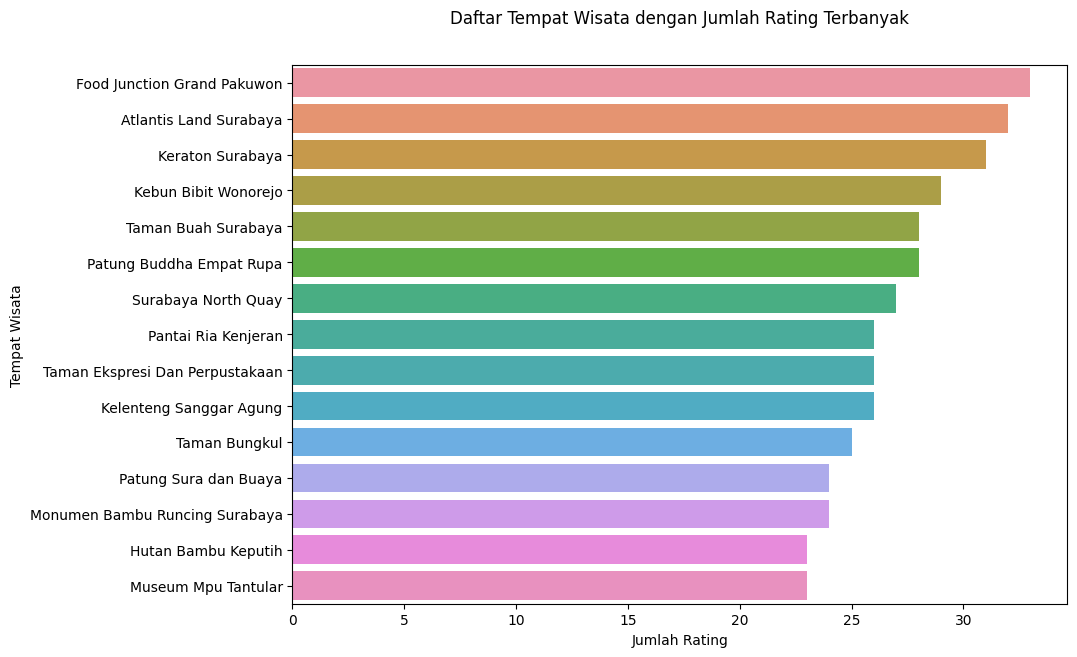

In [20]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_15)
plt.title('Daftar Tempat Wisata dengan Jumlah Rating Terbanyak', pad=30)
plt.xlabel('Jumlah Rating')
plt.ylabel('Tempat Wisata')
plt.show()

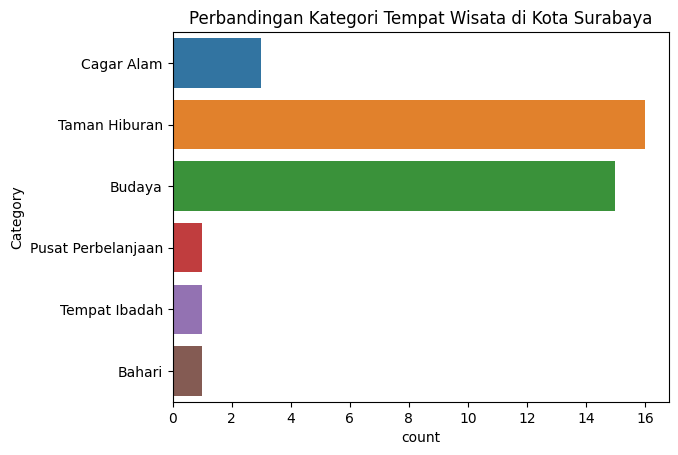

In [21]:
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Kategori Tempat Wisata di Kota Surabaya')
plt.show()